<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6
## Deep Learning for text and sequences

In [0]:
import keras
import numpy as np
import string
import zipfile
import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')


## Working with text data

Before we run a deep learning model on text, we have to convert the text into a numeric tensor. We can e.g. segment into words, segment into characters, or extract n-grams - this is tokenisation. Then we associate each token with a vector, and pack those vectors into a tensor. Here we look at two ways of associating a word with a token:


### One-hot encoding

In [2]:
# Word-level one-hot encoding

# Here we ignore special characters and punctuation.
samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      
# Only consider the first max_length words in each sample
max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1
    
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [3]:
# Character-level one-hot encoding (had to modify this from the example, Challot's code doesn't run)

# Here we only consider ASCII.
samples = ["The cat sat on the mat.", "The dog ate my homework."]

characters = string.printable
token_index = dict(zip(characters, range(1, len(characters)+1)))

# Only consider the first max_length characters in each sample
max_length = 50
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index] = 1
    
print(results[0]) # 2 samples

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
print(token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


Keras has built-ins for both the above which take account of edge cases, special characters, and  only taking the N most common words, so we'll use those

In [5]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

# Turn strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)

# Alternatively, directly get the one-hot binary representations.
one_hot_results = tokenizer.texts_to_matrix(samples, mode="binary")

word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

Found 9 unique tokens


A variant of one-hot encoding is the one-hot hashing trick - rather than explicitly assigning an index to each word and keeping a reference of these indices, hash words into fixed-size vectors - this does away with the explicit word index

In [0]:
# One-hot with hashing

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Store each word as a size-1000 vector
dimensionality = 1000
max_length = 10
results=np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality # Hash to an integer
    results[i,j,index] = 1

### Using word embeddings
Here we use dense word vectors (as opposed to sparse, binary, high-dimensional vectors as in one-hot). These will be floating-point vectors in a low-dimensional space, and we have to learn these from the data.

We can either learn the embedding jointly with the main task, or use pretrained word embeddings

In [7]:
# Learning our own embeddings, hopefully such that the geometry reflects the semantics

max_features=10000
max_length = 20

# Overwrite np.load to allow keras to work with the new Numpy defaults
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
np.load = old
del(old)



# Turns the list of integers into a 2D integer tensor
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

17465344/17464789 [==============================] - 0s 0us/step


In [8]:
model = keras.models.Sequential()
# embedding has inputs: (number of possible tokens, dimensionality)
model.add(keras.layers.Embedding(max_features, 8, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

W0618 10:40:22.205598 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 10:40:22.241738 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 10:40:22.249669 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 10:40:22.286149 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 10:40:22.303842 140446760609664 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

W0618 10:40:22.527907 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 274us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 99us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val

We can get to a validation accuracy of ~75%, seems pretty good from only the first 20 words. However, flattening the embedding sequences and training a single `Dense` layer means we look at each word  separately - this is bad. We have to learn features that account for the sequence as a whole! 

In [15]:
# Using pretrained word embeddings (could use Word2Vec, here we use GloVe)

# First, download the raw text data from the IMDB dataset.
!wget --no-check-certificate \
    http://mng.bz/0tIo \
    -O /tmp/aclimdb.zip
zip_ref = zipfile.ZipFile("/tmp/aclimdb.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2019-06-18 10:50:28--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2019-06-18 10:50:28--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2019-06-18 10:50:28--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.245|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘/tmp/aclimdb.zip’

/tmp/aclimdb.zip    100%[===================>]  57.90M  50.8MB/s    in 1.1s    

2019-06-18 10:50:29 (50.8 MB/s) - ‘/tmp/aclimdb.zip’

In [0]:
# Scrape the data into lists 
imdb_dir = "/tmp/aclImdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
texts = []

for label_type in ["neg", "pos"]:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == ".txt":
      with open(os.path.join(dir_name, fname)) as flines:
        texts.append(flines.read())
      labels.append(0 if label_type == "neg" else 1)
      

In [34]:
# Tokenize our text. Here, we artifically limit ourselves to just 200 training samples

max_length = 20
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
labels = np.asarray(labels)

print(f"Shape of data tensor: {data.shape}")
print(f"Shape of label tensor: {labels.shape}")

# Shuffle and split the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train = data[:training_samples]
y_train = labels[:training_samples]
X_val = data[training_samples: training_samples+validation_samples]
y_val = labels[training_samples: training_samples+validation_samples]



Found 88582 unique tokens
Shape of data tensor: (25000, 20)
Shape of label tensor: (25000,)


In [35]:
# Download the GloVe embeddings
!wget --no-check-certificate \
    http://nlp.stanford.edu/data/glove.6B.zip \
    -O /tmp/glove.6B.zip
zip_ref = zipfile.ZipFile("/tmp/glove.6B.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()




--2019-06-18 11:03:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-06-18 11:03:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-06-18 11:03:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [37]:
# Parse the embeddings into an index mapping words to their vector reprs
glove_path = "/tmp/glove.6B.100d.txt"

embeddings_index = {}
with open(glove_path) as flines:
  for line in flines:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
    
print(f"Found {len(embeddings_index)} word vectors")

Found 400000 word vectors


In [0]:
# Now build an embedding matrix we can load into an Embedding layer

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [39]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Load the GloVe matrix into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [42]:
# Compile and train
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model.save_weights("/content/drive/My Drive/Colab Notebooks/pre_trained_glove_model.h5")

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7453 - acc: 0.5450 - val_loss: 0.7165 - val_acc: 0.4969
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5676 - acc: 0.7500 - val_loss: 0.7809 - val_acc: 0.5051
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4935 - acc: 0.7400 - val_loss: 0.7351 - val_acc: 0.4999
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3533 - acc: 0.9450 - val_loss: 0.9398 - val_acc: 0.5013
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3361 - acc: 0.8600 - val_loss: 0.8728 - val_acc: 0.5067
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2509 - acc: 0.9600 - val_loss: 0.9588 - val_acc: 0.5030
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2062 - acc: 0.9750 - val_loss: 0.8176 - val_acc: 0.4989
Epoch 8/10
200/200 [========

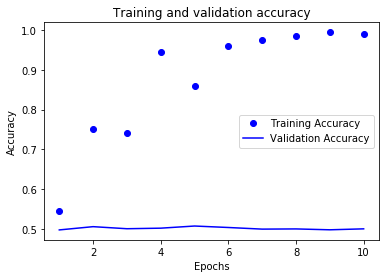

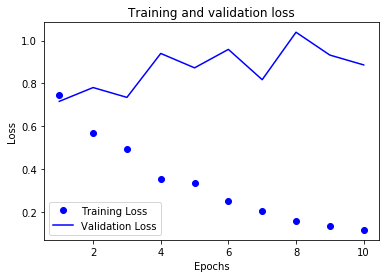

In [45]:
# Plot the loss and accuracy of the model over the training and validation data
def plotLossAndAccuracy(history):
  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, acc, "bo", label="Training Accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plotLossAndAccuracy(history)


Hefty amounts of overfitting! What happens if we don't use the pretrained word embeddings, and don't freeze the embedding layer?

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6942 - acc: 0.4700 - val_loss: 0.6938 - val_acc: 0.4912
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6221 - acc: 1.0000 - val_loss: 0.6948 - val_acc: 0.4978
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5474 - acc: 1.0000 - val_loss: 0.6970 - val_acc: 0.4938
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4386 - acc: 1.0000 - val_loss: 0.7016 - val_acc: 0.4989
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3121 - acc: 1.0000 - val_loss: 0.7094 - val_acc: 0.4982
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 1.0000 - val_loss: 0.7197 - val_acc: 0.4978
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1280 - acc: 1.0000 - val_loss: 0.7295 - val_acc: 0.4964
Epoch 8/10
200/200 [========

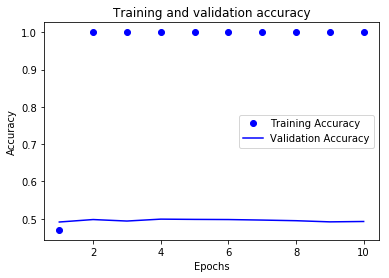

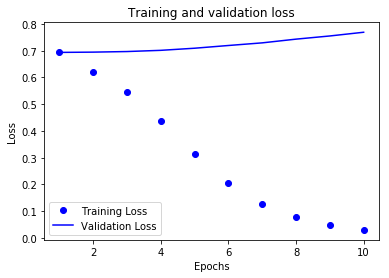

In [46]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
# Compile and train
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
plotLossAndAccuracy(history)


In [0]:
# Evaluate the model on the test data

test_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == ".txt":
      with open(os.path.join(dir_name, fname)) as flines:
        texts.append(flines.read())
      labels.append(0 if label_type == "neg" else 1)
      

sequences = tokenizer.texts_to_sequences(texts)
X_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
y_test = np.asarray(labels)    


In [49]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/pre_trained_glove_model.h5")
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 1s 44us/step


[0.8860045902633668, 0.50624]

Only 50% accuracy!

## Recurrent Neural Networks